### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('Downloads/assignment_5_1_starter/data/coupons.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
#function to check the percentage of missing data
def percent_missing(data):
    percent_nan = 100 * data.isnull().sum()/len(data)
    percent_nan = percent_nan[percent_nan > 0 ].sort_values()
    
    return percent_nan

In [7]:
#calculated the percentage of missing values for each column and assigning it to the variable percent_nan
percent_nan = percent_missing(df)

In [8]:
percent_nan

Bar                      0.843582
RestaurantLessThan20     1.024913
CarryAway                1.190476
Restaurant20To50         1.490066
CoffeeHouse              1.710817
car                     99.148534
dtype: float64

Observation 1 : from the above cells it is observed that the car, CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, Bar attributes has 99%, 1.7%,1.5%, 1.2%,1% and 0.8% missing values respectively

3. Decide what to do about your missing data -- drop, replace, other...

3a) Based on the fact that over 90% of the attributes car is missing, i decided to drop the car column, in order not to introduce bias to the model.

3b) considering that the coffeehouse attribute has to do with number of visits, less than 1 visit is the same as never visit. therefore i replaced less 1 with never and replaced nan with never, considering that never is the modal value.

3c) considering that the Restaurant20To50 attribute has to do with number of visits, less than 1 visit is the same as never visit. therefore i replaced less 1 with never and replaced nan with never, considering that never is the modal value.

3d) considering that the CarryAway attribute has to do with number of visits, less than 1 visit is the same as never visit. therefore i replaced less 1 with never. i then replaced nan with 1\~2, considering that 1\~2 is the modal value.

3e) considering that the RestaurantLessThan20 attribute has to do with number of visits, less than 1 visit is the same as never visit. therefore i replaced less 1 with never. i then replaced nan with 1\~2, considering that 1\~2 is the modal value.

3f) considering that the Bar attribute has to do with number of visits, less than 1 visit is the same as never visit. therefore i replaced less 1 with never and replaced nan with never, considering that never is the modal value.




# car

In [9]:
#counted the occurrences of each unique value in the 'car' column of the DataFrame
df.car.value_counts(dropna=False)

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64

In [10]:
#removed the 'car' column from the DataFram
df.drop('car',axis=1, inplace=True)

In [11]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

# coffeehouse

In [12]:
#counted the occurrences of each unique value in the 'CoffeeHouse' column of the DataFrame
df.CoffeeHouse.value_counts(dropna=False)

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64

In [13]:
#filled missing values in the 'CoffeeHouse' column with the value "never"
df.CoffeeHouse.fillna("never",inplace=True)

In [14]:
#counted the occurrences of each unique value in the 'CoffeeHouse' column of the DataFrame
df.CoffeeHouse.value_counts(dropna=False)

less1    3385
1~3      3225
never    3179
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [15]:
#replaced the value 'less1' in the 'CoffeeHouse' column with 'never'
df['CoffeeHouse'].replace('less1',"never",inplace=True)

In [16]:
df.CoffeeHouse.value_counts(dropna=False)

never    6564
1~3      3225
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

# Restaurant20To50

In [17]:
#counted the occurrences of each unique value in the 'Restaurant20To50' column of the DataFrame
df.Restaurant20To50.value_counts(dropna=False)

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
NaN       189
Name: Restaurant20To50, dtype: int64

In [18]:
#filled missing values in the 'Restaurant20To50' column with the value "never"
df.Restaurant20To50.fillna("never",inplace=True)

In [19]:
df.Restaurant20To50.value_counts(dropna=False)

less1    6077
1~3      3290
never    2325
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [20]:
#replaced the value 'less1' in the 'Restaurant20To50' column with 'never'
df.Restaurant20To50.replace('less1',"never",inplace=True)

In [21]:
df.Restaurant20To50.value_counts(dropna=False)

never    8402
1~3      3290
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

# CarryAway

In [22]:
#counted the occurrences of each unique value in the 'CarryAway' column of the DataFrame
df.CarryAway.value_counts(dropna=False)

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
NaN       151
Name: CarryAway, dtype: int64

In [23]:
#filled missing values in the 'CarryAway' column with the value "1~3"
df.CarryAway.fillna("1~3",inplace=True)

In [24]:
df.CarryAway.value_counts(dropna=False)

1~3      4823
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [25]:
#replaced the value 'less1' in the 'CarryAway' column with 'never'
df.CarryAway.replace('less1',"never",inplace=True)

In [26]:
df.CarryAway.value_counts(dropna=False)

1~3      4823
4~8      4258
never    2009
gt8      1594
Name: CarryAway, dtype: int64

# RestaurantLessThan20

In [27]:
#counted the occurrences of each unique value in the 'RestaurantLessThan20' column of the DataFrame
df.RestaurantLessThan20.value_counts(dropna=False)

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
NaN       130
Name: RestaurantLessThan20, dtype: int64

In [28]:
#filled missing values in the 'RestaurantLessThan20' column with the value "1~3"
df.RestaurantLessThan20.fillna("1~3",inplace=True)

In [29]:
df.RestaurantLessThan20.value_counts(dropna=False)

1~3      5506
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [30]:
#replaced the value 'less1' in the 'RestaurantLessThan20' column with 'never'
df.RestaurantLessThan20.replace('less1',"never",inplace=True)

In [31]:
df.RestaurantLessThan20.value_counts(dropna=False)

1~3      5506
4~8      3580
never    2313
gt8      1285
Name: RestaurantLessThan20, dtype: int64

# Bar

In [32]:
#counted the occurrences of each unique value in the 'Bar' column of the DataFrame
df.Bar.value_counts(dropna=False)

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
NaN       107
Name: Bar, dtype: int64

In [33]:
#filled missing values in the 'Bar' column with the value "never"
df.Bar.fillna("never",inplace=True)

In [34]:
df.Bar.value_counts(dropna=False)

never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [35]:
#replaced the value 'less1' in the 'Bar' column with 'never'
df.Bar.replace('less1',"never",inplace=True)

In [36]:
df.Bar.value_counts(dropna=False)

never    8786
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



In [37]:
#calculated the proportion of accepted coupons in the DataFrame and expressed it as a percentage
total_observations = len(df)
accepted_coupon_observations = len(df[df['Y'] == 1])

proportion_accepted_coupon = accepted_coupon_observations / total_observations * 100
proportion_accepted_coupon

56.84326710816777

Observation 2 :The proportion of the total observations that chose to accept the coupon is 56.8%

In [38]:
#created a categorical mapping and then created a list of labels based on the values in the "Y" column of the DataFrame
cat_map={1:"Accepted",0:"Rejected"}
label=list(df["Y"].map(cat_map).value_counts().keys())

In [39]:
label

['Accepted', 'Rejected']

In [40]:
#mapped the values in the "Y" column of the DataFrame, and then counted the occurrences of each mapped value
df["Y"].map(cat_map).value_counts()

Accepted    7210
Rejected    5474
Name: Y, dtype: int64

In [41]:
label

['Accepted', 'Rejected']

Text(0.5, 1.0, 'proportion of the total observations that chose to accept the coupon')

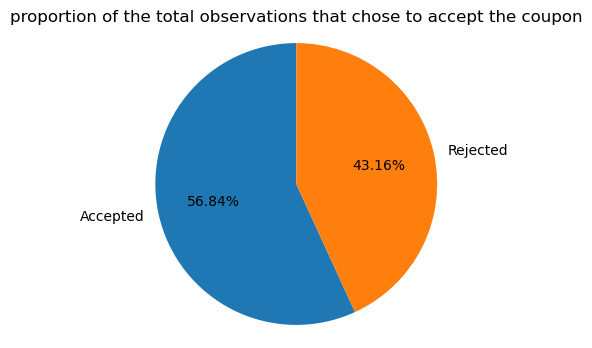

In [42]:
#created a pie chart using Matplotlib to visualize the proportion of the total observations that chose to accept the coupon
plt.figure(figsize=(4, 4))
plt.pie(df["Y"].map(cat_map).value_counts(), autopct='%1.2f%%', labels=label,startangle=90)
plt.axis('equal')

plt.title('proportion of the total observations that chose to accept the coupon')

5. Use a bar plot to visualize the `coupon` column.

In [43]:
#created a new DataFrame coups by resetting the index of the 'coupon' column in the original DataFrame
coups = df['coupon'].reset_index()

In [44]:
#created a new DataFrame "data" containing the value counts of the 'coupon' column from the original DataFrame
data = pd.DataFrame(df.coupon.value_counts()) 

In [45]:
data

,coupon
Coffee House,3996
Restaurant(<20),2786
Carry out & Take away,2393
Bar,2017
Restaurant(20-50),1492


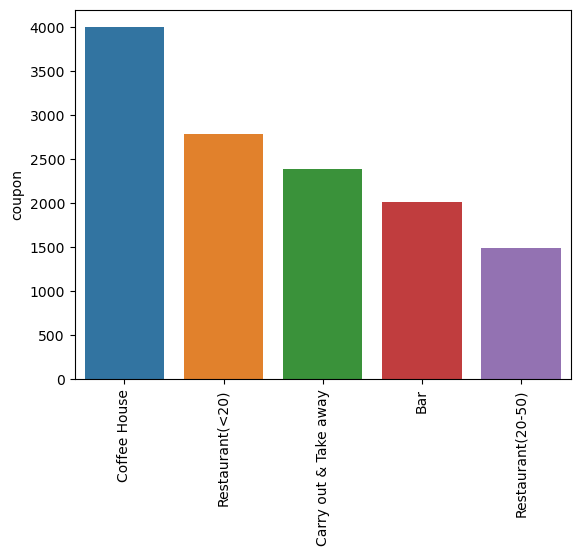

In [46]:
#created a bar plot using Seaborn, with 'coupon' counts on the y-axis and the unique values from the 'coupon' column on the x-axis
sns.barplot(data, x=data.index , y= 'coupon')
plt.xticks(rotation = 90)
plt.show()

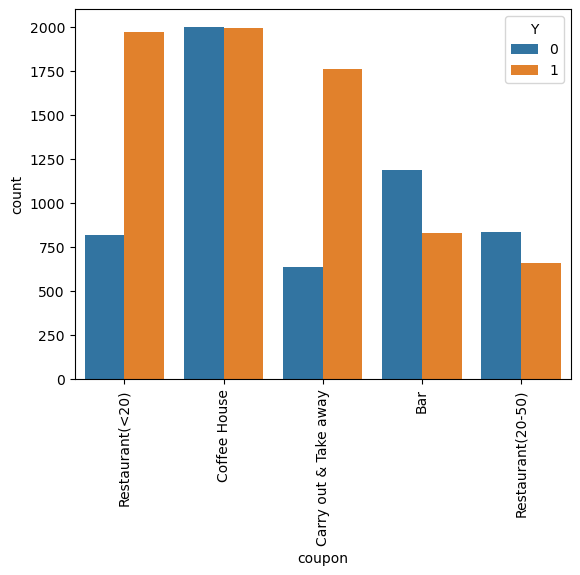

In [47]:
#created a count plot using Seaborn, with 'coupon' values on the x-axis and the count of each 'coupon' for different categories specified by 'Y' on the y-axis.
sns.countplot(x = df['coupon'], hue = df['Y'])
plt.xticks(rotation = 90)
plt.show()

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

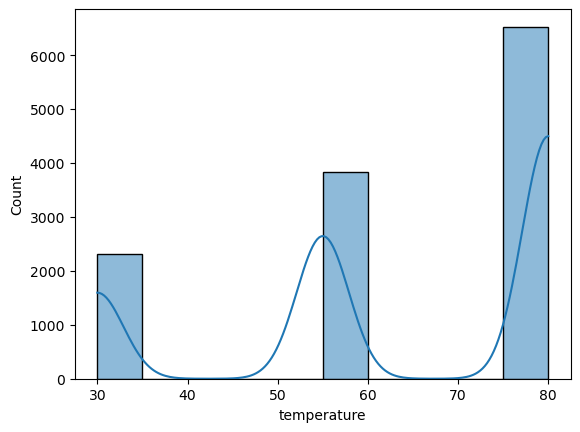

In [48]:
#created a histogram for the 'temperature' column in the DataFrame using Seaborn
sns.histplot(df, x = 'temperature', bins=10, kde=True)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [49]:
#filtered the DataFrame to only include rows where the 'coupon' column has the value 'Bar'
bar_coupons = df[df['coupon'] == 'Bar']

In [50]:
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,4~8,4~8,never,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,4~8,4~8,never,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [51]:
#calculated the total number of rows in the DataFrame bar_coupons
total_bar_coupouns = len(bar_coupons)

In [52]:
#calculated the number of accepted coupons in the DataFrame bar_coupons
num_accepted_coupons = bar_coupons.Y.value_counts()[1]

In [53]:
#calculated the proportion of accepted coupons in the DataFrame bar_coupons
prop_of_accepted_bar_coupon = num_accepted_coupons/total_bar_coupouns
print(f'The Proportion Of Accepted Coupons is {round(prop_of_accepted_bar_coupon,2)*100}%')

The Proportion Of Accepted Coupons is 41.0%


In [54]:
#created a list of labels for a categorical variable "Y" in the DataFrame bar_coupons
label=list(bar_coupons["Y"].map(cat_map).value_counts().keys())

Text(0.5, 1.0, 'proportion of the bar coupons that were accepted')

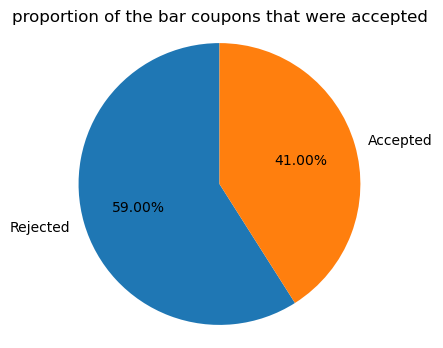

In [55]:
#generated a pie chart illustrating the proportion of accepted and rejected bar coupons in the bar_coupons DataFrame
plt.figure(figsize=(4, 4))
plt.pie(bar_coupons["Y"].value_counts(), labels=label,autopct='%1.2f%%', startangle=90)
plt.axis('equal')

plt.title('proportion of the bar coupons that were accepted')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [56]:
bar_coupons['Bar'].unique()

array(['never', '1~3', 'gt8', '4~8'], dtype=object)

In [57]:
#created a dictionary mapping "never" & "1~3" to "3 or fewer" and "gt8" & "4~8" to "more than 3"
cat_map2 = {"never":"3 or fewer","1~3":"3 or fewer",'gt8':"more than 3",'4~8':"more than 3"}

In [58]:
#created a new data frame of the two categories 
bar_count=pd.DataFrame(bar_coupons.Bar.map(cat_map2))

In [59]:
bar_count.Bar.unique()

array(['3 or fewer', 'more than 3'], dtype=object)

In [60]:
bar_count.Bar.value_counts()

3 or fewer     1818
more than 3     199
Name: Bar, dtype: int64

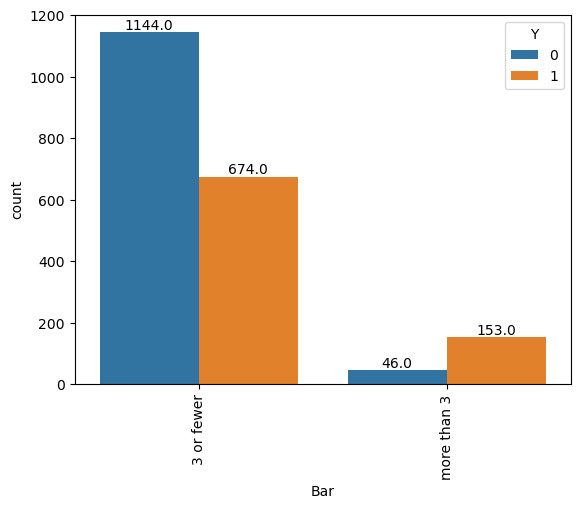

In [61]:
#created a visualization comparing the acceptance rate of "3 or fewer" and the acceptance rate of "more than 3"
ax = sns.countplot(x = bar_count.Bar, hue = bar_coupons.Y)

#annotated the bars with their respective heights
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, f'{height}', ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.show()

Observation 3 :
The acceptance rate for drivers who go to the bar more than 3 times is greater than the acceptance rate of drivers who go to the bar 3 times or fewer

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [62]:
bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [63]:
bar_coupons['Bar'].unique()

array(['never', '1~3', 'gt8', '4~8'], dtype=object)

In [64]:
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,4~8,4~8,never,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,never,4~8,4~8,never,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [65]:
len(bar_coupons.Y)

2017

In [66]:
bar_coupons.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [67]:
#filterd the DataFrame bar_coupons to select rows where the 'Bar' column has values '13', 'gt8', or '48', and the 'age' column has values '46', '26', '31', '41', '50plus', or '36'
over1_and_over25 = bar_coupons[(bar_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) & (bar_coupons['age'].isin(["46","26","31","41","50plus","36"]))]

In [68]:
#created a new column 'over1_and_over25' in the DataFrame bar_coupons
bar_coupons['over1_and_over25'] = bar_coupons.apply(
    lambda x: True if x['Bar'] in ['1~3', 'gt8', '4~8'] and x['age'] in ["46","26","31","41","50plus","36"] else False, axis=1)

/var/folders/s_/v1gz0yqs2z9bbg18b7h118880000gn/T/ipykernel_59723/250063961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['over1_and_over25'] = bar_coupons.apply(


In [69]:
#count the occurrences of True and False in the 'over1_and_over25' column of the DataFrame bar_coupons
bar_coupons['over1_and_over25'].value_counts()

False    1597
True      420
Name: over1_and_over25, dtype: int64

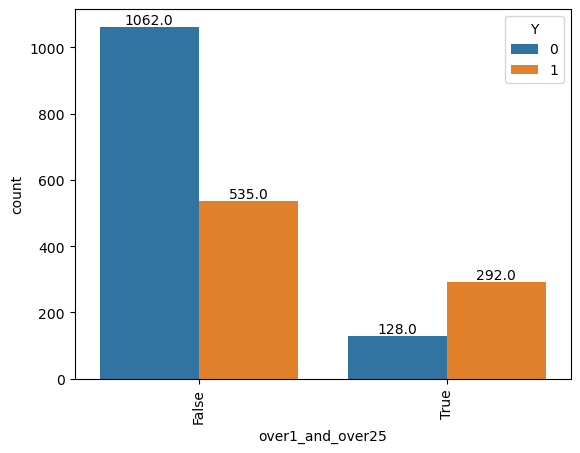

In [70]:
#created a count plot using Seaborn based on the 'over1_and_over25' column in the DataFrame bar_coupons
ax = sns.countplot(x = bar_coupons.over1_and_over25, hue = bar_coupons.Y)

#annotated the bars with their respective heights
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, f'{height}', ha='center', va='bottom')
    
plt.xticks(rotation = 90)
plt.show()

Observation 4 :
The acceptance rate for drivers who go to the bar more than once and are above 25 is greater than the acceptance rate of all others

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [71]:
#created a new column 'over1_and_nonkids_notfff' in the DataFrame 'bar_coupons' 
bar_coupons['over1_and_nonkids_notfff'] = bar_coupons.apply(
    lambda x: True if x['Bar']in ['1~3', 'gt8', '4~8'] and x['passanger'] != 'Kid(s)' 
    and x['occupation'] != 'Farming Fishing & Forestry' else False, axis=1)

/var/folders/s_/v1gz0yqs2z9bbg18b7h118880000gn/T/ipykernel_59723/765473005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['over1_and_nonkids_notfff'] = bar_coupons.apply(


In [72]:
#calculated the value counts of the 'over1_and_nonkids_notfff' column in the DataFrame 'bar_coupons'
bar_coupons['over1_and_nonkids_notfff'].value_counts()

False    1466
True      551
Name: over1_and_nonkids_notfff, dtype: int64

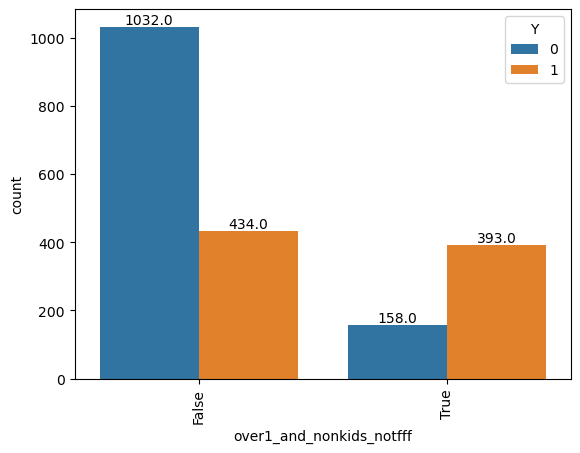

In [73]:
#used Seaborn to create a count plot based on the 'over1_and_nonkids_notfff' column in the DataFrame 'bar_coupons', further differented by the 'Y' column 
ax = sns.countplot(x = bar_coupons.over1_and_nonkids_notfff, hue = bar_coupons.Y)

#annotated the bars with their respective heights
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, f'{height}', ha='center', va='bottom')
    
plt.xticks(rotation = 90)
plt.show()

Observation 5:
The acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is greater than all others

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [74]:
bar_coupons.maritalStatus.unique()

array(['Unmarried partner', 'Single', 'Married partner', 'Divorced',
       'Widowed'], dtype=object)

In [75]:
#created a new column in the DataFrame bar_coupons named 'over1_and_nonkids_notwidowed'
bar_coupons['over1_and_nonkids_notwidowed'] = bar_coupons.apply(
    lambda x: True if x['Bar']in ['1~3', 'gt8', '4~8'] and x['passanger'] != 'Kid(s)' 
    and x['maritalStatus'] != 'Widowed' else False, axis=1)

/var/folders/s_/v1gz0yqs2z9bbg18b7h118880000gn/T/ipykernel_59723/2477097898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons['over1_and_nonkids_notwidowed'] = bar_coupons.apply(


In [76]:
bar_coupons['over1_and_nonkids_notwidowed'].value_counts()

False    1466
True      551
Name: over1_and_nonkids_notwidowed, dtype: int64

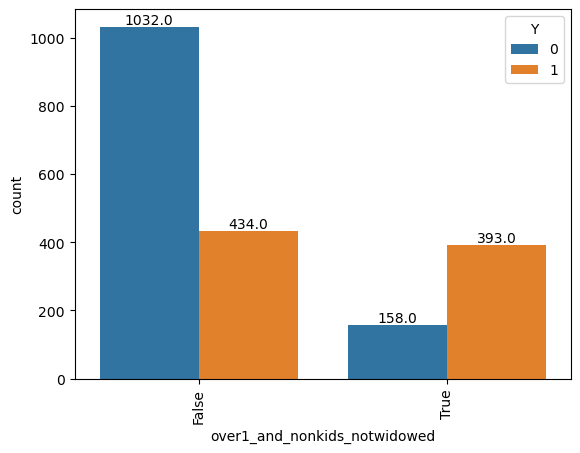

In [77]:
#creates a count plot using Seaborn with counts of observations for each category on the x-axis and the counts are further differentiated by the 'Y' variable
ax = sns.countplot(x = bar_coupons.over1_and_nonkids_notwidowed, hue = bar_coupons.Y)

#annotated the bars with their respective heights
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, f'{height}', ha='center', va='bottom')
    
plt.xticks(rotation = 90)
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Hypothesis: 

### -drivers who have been to the bar more than 3 times a month are more likely to accept bar coupons than drivers who have been to the bar 3 times or less

### -drivers above the age of 25 and have visited the bar more than once a month are more likely to accept bar coupons than all other drivers

### -drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry are more likely to accept bar coupons than all other drivers

### -drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed had the same results as drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry



## This hypothesis suggests that age, frequency of visiting the bar, and type of passanger and strong factors that influence the acceptance of bar coupons among drivers.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. Created a new `DataFrame` that contains just the coffee house coupons.

In [78]:
coffee_house_coupons = df[df['coupon'] == 'Coffee House']

In [79]:
coffee_house_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,never,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,never,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. calculated the proportion of Coffee House coupons were accepted?

In [80]:
#calculated and printed the proportion of accepted Coffee House coupons
total_coffee_house_coupons = len(coffee_house_coupons)

num_accepted_coupons = coffee_house_coupons.Y.value_counts()[1]

prop_of_accepted_coffee_house_coupons = num_accepted_coupons/total_coffee_house_coupons
print(f'The Proportion Of Accepted Coupons is {round(prop_of_accepted_coffee_house_coupons,2)*100}%')

The Proportion Of Accepted Coupons is 50.0%


Text(0.5, 1.0, 'proportion of the Coffee House coupons that were accepted')

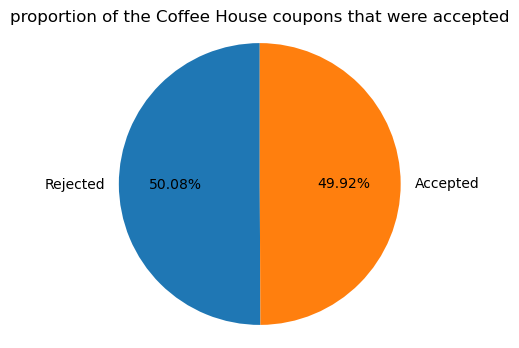

In [81]:
#generated a pie chart to visualize the proportion of accepted and rejected Coffee House coupons in the DataFrame coffee_house_coupons
label=list(coffee_house_coupons["Y"].map(cat_map).value_counts().keys())

plt.figure(figsize=(4, 4))
plt.pie(coffee_house_coupons["Y"].value_counts(), labels=label,autopct='%1.2f%%', startangle=90)
plt.axis('equal')

plt.title('proportion of the Coffee House coupons that were accepted')


3. Compared the acceptance rate between those who went to a Coffee house 3 or fewer times a month to those who went more.

In [82]:
coffee_house_coupons['CoffeeHouse'].unique()

array(['never', '4~8', '1~3', 'gt8'], dtype=object)

In [83]:
#created a dictionary mapping "never" & "1~3" to "3 or fewer" and "gt8" & "4~8" to "more than 3"
cat_map3 = {"never":"3 or fewer","1~3":"3 or fewer",'gt8':"more than 3",'4~8':"more than 3"}

In [84]:
#created a new data frame of the two categories 
coffee_house_count=pd.DataFrame(coffee_house_coupons.CoffeeHouse.map(cat_map3))

In [85]:
coffee_house_count.CoffeeHouse.unique()

array(['3 or fewer', 'more than 3'], dtype=object)

In [86]:
coffee_house_count.CoffeeHouse.value_counts()

3 or fewer     3116
more than 3     880
Name: CoffeeHouse, dtype: int64

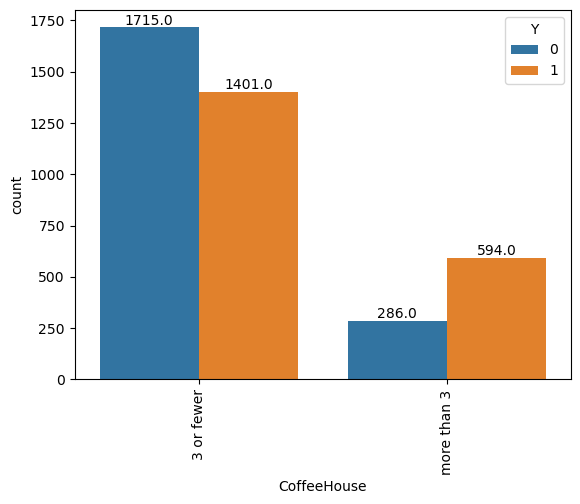

In [87]:
#created a visualization comparing the acceptance rate of "3 or fewer" and the acceptance rate of "more than 3"
ax = sns.countplot(x = coffee_house_count.CoffeeHouse, hue = coffee_house_coupons.Y)

#annotated the bars with their respective heights
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, f'{height}', ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.show()

Observation 6:
The acceptance rate for drivers who go to the Coffee house more than 3 times is greater than the acceptance rate of drivers who go to the Coffee house 3 times or fewer

4. Compared the acceptance rate between drivers who go to a Coffee house more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [88]:
coffee_house_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [89]:
coffee_house_coupons['Bar'].unique()

array(['never', '1~3', 'gt8', '4~8'], dtype=object)

In [90]:
coffee_house_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,never,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,never,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [91]:
#calculated the length of the 'Y' column in the DataFrame coffee_house_coupons
len(coffee_house_coupons.Y)

3996

In [92]:
coffee_house_coupons.age.unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [93]:
#filtered a DataFrame named coffee_house_coupons to select rows where the 'Bar' column has values '13', 'gt8', or '48', and the 'age' column has values from the list ["46", "26", "31", "41", "50plus", "36"]
over1_and_over25 = coffee_house_coupons[(coffee_house_coupons['Bar'].isin(['1~3', 'gt8', '4~8'])) & (coffee_house_coupons['age'].isin(["46","26","31","41","50plus","36"]))]

In [94]:
#created a new column named 'over1_and_over25' in the DataFrame coffee_house_coupons
coffee_house_coupons['over1_and_over25'] = coffee_house_coupons.apply(
    lambda x: True if x['Bar'] in ['1~3', 'gt8', '4~8'] and x['age'] in ["46","26","31","41","50plus","36"] else False, axis=1)

/var/folders/s_/v1gz0yqs2z9bbg18b7h118880000gn/T/ipykernel_59723/3013260034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coffee_house_coupons['over1_and_over25'] = coffee_house_coupons.apply(


In [95]:
coffee_house_coupons['over1_and_over25'].value_counts()

False    3120
True      876
Name: over1_and_over25, dtype: int64

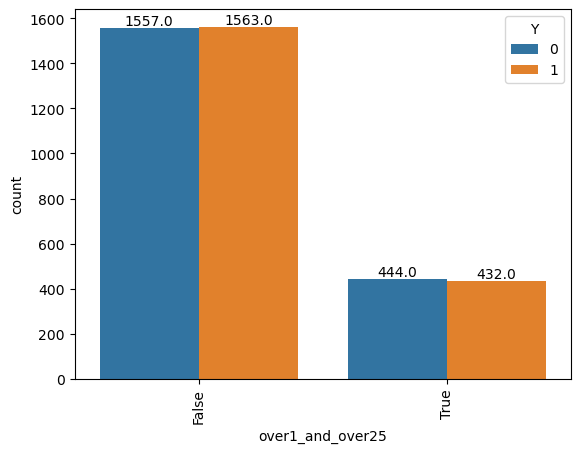

In [96]:
#created a count plot using seaborn to display the distribution of the 'over1_and_over25' column in the DataFrame coffee_house_coupons, with hue based on the 'Y' column
ax = sns.countplot(x = coffee_house_coupons.over1_and_over25, hue = coffee_house_coupons.Y)

#annotated the bars with their respective heights
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height, f'{height}', ha='center', va='bottom')
    
plt.xticks(rotation = 90)
plt.show()

Observation 7 :
The acceptance rate for drivers who go to the Coffee house more than once a month and are above 25 is very close to 50% the same applies to the acceptance rate of all others 
